<a href="https://colab.research.google.com/github/Suruchi264/NLP-DL-ML/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('/content/sample_data/height-weight.csv')

pandas as pd for data handling

matplotlib.pyplot as plt for plotting

numpy as np for numerical operations

Then it reads height-weight.csv into a DataFrame via:

python
Copy code
df = pd.read_csv('height-weight.csv')
df.head()
This shows the first few rows, typically two columns: Weight and Height.

This aligns exactly with your theory: loading the dataset, displaying df.head(), and noting independent (Weight) and dependent (Height) features.

In [5]:
df.head()

,Weight(Independent Feature),Height(Dependent Feature)
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

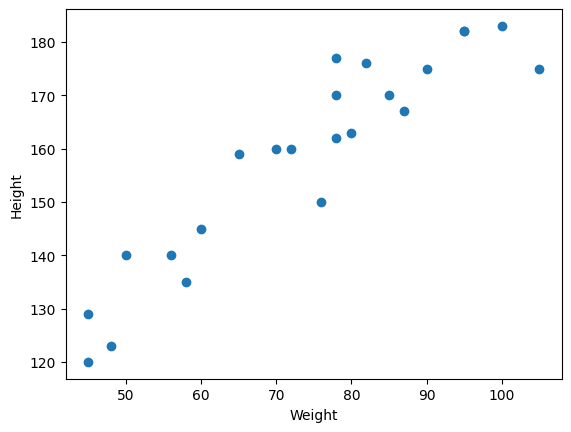

In [13]:
## In simple linear regression it is very imp to know that how the independent
## and dependent features are related to each other
## scatter plot

plt.scatter(df['Weight(Independent Feature) '],df['Height(Dependent Feature)'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [14]:
## Correlation
df.corr()

,Weight(Independent Feature),Height(Dependent Feature)
Weight(Independent Feature),1.000000,0.931142
Height(Dependent Feature),0.931142,1.000000


And the correlation coefficient around 0.93 confirms a strong positive correlation, consistent with your write‑up.

This step mirrors your "Visualizing Data and Checking Correlation" section.

To understand the relationship between weight and height, we plot a scatter plot using plt.scatter with weight on the x-axis and height on the y-axis. We label the axes accordingly.

The scatter plot shows a positive linear relationship: as weight increases, height also increases.

To quantify this, we calculate the Pearson correlation coefficient using df.corr(). The correlation between weight and height is approximately 0.93, indicating a strong positive correlation.

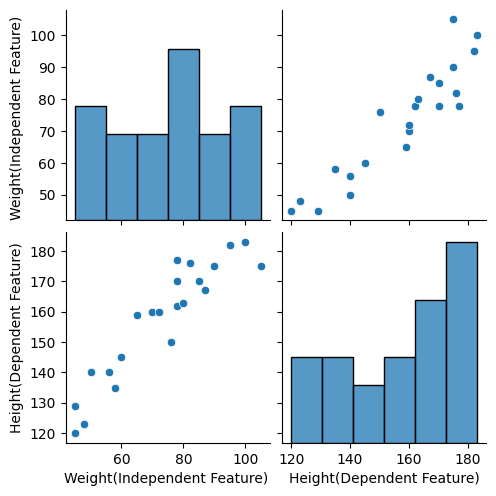

In [15]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [16]:
## Independent and dependent features
df.head()

,Weight(Independent Feature),Height(Dependent Feature)
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [17]:
## Independent and dependent features
X = df['Weight(Independent Feature) ']
X
type(X)

pandas.core.series.Series

In [18]:
## Independent and dependent features
X = df[['Weight(Independent Feature) ']] ## independent features should be a data frame or 2 dimensional array
X
np.array(X) ## 2d array
np.array(X).shape
X.head()

,Weight(Independent Feature)
0,45
1,58
2,48
3,60
4,70


In [19]:
X_series = df['Weight(Independent Feature) ']
np.array(X).shape

(23, 1)

In [20]:
X = df[['Weight(Independent Feature) ']]
Y = df['Height(Dependent Feature)'] ## this variable can be in series or 1 d array

Here, X is two‑dimensional (DataFrame), while y is a one‑dimensional Series — exactly as your theory indicates: independent feature as 2D, dependent as 1D.

In [21]:
Y

,Height(Dependent Feature)
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [22]:
np.array(Y).shape

(23,)

In [23]:
## train test split
from sklearn.model_selection import train_test_split

🔍 Explanation:
✅ from sklearn.model_selection import train_test_split
This imports the train_test_split function from sklearn, which helps us split the dataset into training and testing subsets.

Why? We don’t want to test our model on the same data it was trained on — that would give an unrealistically high accuracy. Instead, we split the data:

Training data: used to teach the model.

Testing data: used to evaluate how well the model generalizes to unseen data.


🧠 Why is this important in theory?
Splitting the data ensures we can evaluate the model’s performance on unseen data.

It helps avoid overfitting, where the model performs well on training data but poorly on new inputs.

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=2)

In [25]:
X_train.shape

(17, 1)

In [26]:
## standardization
from sklearn.preprocessing import StandardScaler

This imports StandardScaler, a tool for scaling features to a standard range using z-score normalization.

In [27]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-1.22768661],
       [ 1.73502714],
       [-0.04260111],
       [-0.56930578],
       [ 0.22075122],
       [-0.04260111],
       [-0.8984962 ],
       [-1.35936278],
       [-2.01774362],
       [ 0.74745589],
       [ 0.54994164],
       [-0.17427728],
       [ 1.07664631],
       [-0.43762961],
       [ 1.40583672],
       [-0.04260111],
       [ 1.07664631]])

In [28]:
X_test = scaler.transform(X_test)

scaler = StandardScaler()
We create an instance (object) of the StandardScaler class named scaler.

✅ X_train_scaled = scaler.fit_transform(X_train)
This performs two actions:

.fit(X_train): Calculates the mean (μ) and standard deviation (σ) of the X_train data.

.transform(X_train): Applies the standardization formula to each value:

𝑧
=
𝑥
𝑖
−
𝜇
𝜎
z=
σ
x
i
​
 −μ
​

where:

𝑥
𝑖
x
i
​
  is an individual value,

𝜇
μ is the mean,

𝜎
σ is the standard deviation.

The result: X_train_scaled contains values with mean ≈ 0 and standard deviation ≈ 1.

✅ X_test_scaled = scaler.transform(X_test)
Only transform, not fit again!

This standardizes X_test using the same mean and standard deviation as the training data.

Why not .fit_transform(X_test)?

To avoid data leakage — we must not let information from the test set influence the training process.

🧠 Why do we standardize features?
If features have very different scales (e.g., kilograms vs. kilometers), models like linear regression can be biased toward large-scale features.

Standardization improves model performance, training speed, and is essential when using gradient-based methods.



In [29]:
X_test

array([[-2.21525787],
       [-2.21525787],
       [-1.49103895],
       [ 0.08907505],
       [ 0.41826547],
       [-1.88606745]])

In [30]:
## Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [37]:
regression = LinearRegression(n_jobs=-1)

## n_jobs=-1 ==> running all the processors in the model

In [38]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [41]:
regression.coef_

## only 1 value because there is only 1 independent feature
## y = B0 + B1x1 , then this value below is nothing but beta1(B1)
# here x1 is a data point, nothing but weight

array([0.97900168])

In [42]:
print("Coefficient or slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient or slope:  [0.97900168]
Intercept:  86.59263258939286


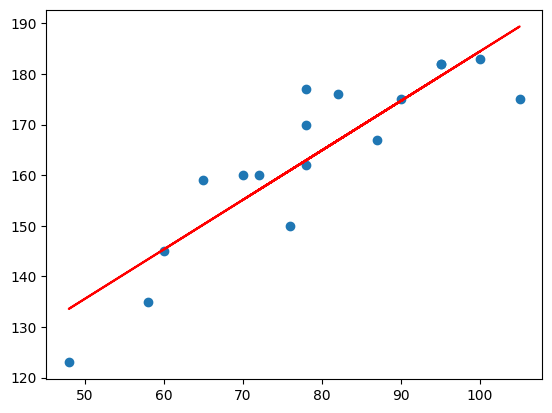

In [44]:
## plot training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train),color='red')

✅ plt.scatter(X_train, Y_train)
🔧 What It Does:
This creates a scatter plot of the training data.

It plots X_train (standardized weight values) on the x-axis, and Y_train (actual height values) on the y-axis.

🎯 Why It's Performed:
To visualize the raw training data points — i.e., what the actual data looks like before the model fits it.

Scatter plots help us visually inspect relationships — here we expect a linear upward trend between weight and height.

📚 Aligns with Theory:
"We plot the training data points using plt.scatter(X_train, y_train)."

This line implements that exact step — a visual confirmation of the training data distribution.

✅ plt.plot(X_train, regression.predict(X_train), color='red')
🔧 What It Does:
Plots the predicted values (i.e., the best-fit line) over the same X_train values.

regression.predict(X_train) gives the predicted y (height) values from the trained model.

color='red' draws the regression line in red for clear contrast with the scatter points.

🎯 Why It's Performed:
To superimpose the regression line onto the scatter plot.

This line is the result of the learned linear relationship:

𝑦
^
=
𝛽
0
+
𝛽
1
𝑥
y
^
​
 =β
0
​
 +β
1
​
 x
It's a visual confirmation of how well the model fits the data.

 Behind the Scenes:
The regression model (created earlier with LinearRegression()) has already learned:

The coefficient (slope): how much height changes with weight.

The intercept: estimated height when weight is 0 (in standardized units if scaled).

🧠 What Can We Conclude from This Plot?
If the red line closely follows the pattern of the scatter points:

The model is a good fit.

The relationship is approximately linear.

If the points deviate widely:

The data might be non-linear or have more variability.

This visual step is crucial before moving on to prediction and performance metrics.

***Prediction of test data***


predicted height output = intercept + coef_(weights)
y_pred_test = 156.470 + 17.29(X_test)

In [46]:
## prediction for test data
y_pred = regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


🔍 Explanation:
regression.predict(X_test) uses the trained model to predict the height (Y_pred) for each standardized test weight in X_test.

The model applies the learned equation:

𝑦
^
=
𝛽
0
+
𝛽
1
𝑥
y
^
​
 =β
0
​
 +β
1
​
 x
These predictions are stored in Y_pred.

✅ Final Step (Optional): Interpreting Results
If your model gave:

R² = 0.91 → 91% of the variance in height is explained by weight.

Slope (β₁) = 17.29 → 1-unit increase in weight = ~17.29 unit increase in height.

Intercept (β₀) = 156.47 → predicted height when weight = 0 (in context or standardized terms).

Low MSE and RMSE → model is making predictions close to actual values.

In [47]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

3671.581537337433
58.26519873594433
60.59357670031893


***R Square***

**Formula -**

**R^2** = 1 - SSR/SST

**R^2** = coefficient of determination

**SSR** = sum of squares of residuals

**SST** = total sum of squares

***The formula for adjusted R-squared -***

[(1-R2)*(n-1)/(n-k-1)]

**R2** = the R2 of the model

**n** = number of observations

**k** = number of predictor variables

In [49]:
from sklearn.metrics import r2_score

In [50]:
score = r2_score(Y_test,y_pred)
print(score)

-10.784676831682205


In [51]:
# display adjusted R - squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-13.730846039602756

In [52]:
## OLS Linear Regression
import statsmodels.api as sm

In [53]:
model = sm.OLS(Y_train,X_train).fit()

In [55]:
prediction = model.predict(X_test)
print(prediction)

[-4.52010254 -4.52010254 -3.04237671  0.18175238  0.85344593 -3.84840898]


In [56]:
print(model.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Height(Dependent Feature)   R-squared (uncentered):                   0.988
Model:                                   OLS   Adj. R-squared (uncentered):              0.987
Method:                        Least Squares   F-statistic:                              1304.
Date:                       Sat, 26 Jul 2025   Prob (F-statistic):                    9.18e-17
Time:                               08:58:03   Log-Likelihood:                         -73.354
No. Observations:                         17   AIC:                                      148.7
Df Residuals:                             16   BIC:                                      149.5
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
                                   coef    std err

In [59]:
## prediction for new data
regression.predict([[72]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([157.08075354])

| **Code**                     | **Purpose**                         | **Theory Connection**          |
| ---------------------------- | ----------------------------------- | ------------------------------ |
| `regression.predict(X_test)` | Predicts height using trained model | "Predicting on Test Data"      |
| `mean_squared_error(...)`    | Measures average squared error      | "Evaluating Model Performance" |
| `mean_absolute_error(...)`   | Measures average absolute error     | "Model Evaluation"             |
| `np.sqrt(mse)`               | RMSE – interpretable error          | "Root Mean Squared Error"      |
| `r2_score(...)`              | Variance explained by model         | "Calculating R-squared"        |
| Manual `adj_r2`              | Adjusted R² for model comparison    | "Adjusted R-squared Formula"   |
